In [10]:
## -*-encoding:utf-8-*-
import requests
from bs4  import BeautifulSoup
import random
import time
import matplotlib.pyplot as plt
import os
import cv2

def cn_Login1(r,isProxy=1,proxyIp='10.244.155.153',proxyPort='8081'):
    if isProxy==0:
        proxy={}
    elif(isProxy==1):
        proxy={'http':proxyIp+':'+proxyPort,'https':proxyIp+':'+proxyPort}
    cn_UserAgent='Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/48.0.2564.116 Safari/537.36 TheWorld 7'
    cn_accept='text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8'
    header={'User-Agent': cn_UserAgent,'Accept':cn_accept,'Accept-Language':'zh-CN,zh;q=0.8','Accept-Encoding':'gzip, deflate'}
    parma={'backURL':'http://gd.10086.cn/service/index.shtml','reqType':'1','channel':'0','cid':'','area':'','resource':'','loginType':'2','optional':'on','exp':''}
    url='https://gd.ac.10086.cn/ucs/login/signup.jsps'
    result=r.post(url,data=parma,headers=header,proxies=proxy,verify=False)
    soup=BeautifulSoup(result.text,'lxml')
    soup1=str(soup.findAll("script")[7])
    soup2=soup1.find('"n":"')
    #获取随机码
# d5e3ec9e68196d71ef728324698087c22aae6ebd0b798ed7a4ab082588cc662f2d5780199696033f983d76312f01b07a801922b9a40a578a0c61e838112baee1
# b9e0c53bb6493777bc1ac46b61e3d292d6efa381000bc2b3c9bc5052744e5ec90b013c18a811315cd56ab11c4a4f6f14a8cc2fb16b9556ff630a9e520f1ff4bd
# be6b6b6892f872474189f554e02a63292f1c0e47830525a52348ee51c275fa35482bd849f082204422e7689d15f8b5042f579c4c9ac3a573a974255d4a0618bb
# 88ef1d14785f26490bcb86a4ea58065511ea273f7232d5e3645a09cda5b71a8f7bfb4974d5cb179a64ce85cbd47cd3b31030f496bc943434924d7c7df141e55f
    
    cn_n_value=soup1[soup2+5:soup2+133]
    return cn_n_value
    
def cn_login2(cn_n_value):
    cn_n_value1='be6b6b6892f872474189f554e02a63292f1c0e47830525a52348ee51c275fa35482bd849f082204422e7689d15f8b5042f579c4c9ac3a573a974255d4a0618bb'
    cn_n_value1_result='066e2f28dda41045e4aec83e9e89b8940b0de656153300e870fa959507113b9a69a61de45cc9a659a12f8d1068b87732537c91c9413c4f84a9bc8d8a454679f9'
    
    cn_n_value2='d5e3ec9e68196d71ef728324698087c22aae6ebd0b798ed7a4ab082588cc662f2d5780199696033f983d76312f01b07a801922b9a40a578a0c61e838112baee1'
    cn_n_value2_result='bfb371aeff18d0b74d166ee5fac0c1ad5f3d196e840b715503dac6bdb08eda3f5c696ad5a9ac3744e99bb68176edc3bc517458ecfd999e559f0e267c77825e27'
    
    cn_n_value3='88ef1d14785f26490bcb86a4ea58065511ea273f7232d5e3645a09cda5b71a8f7bfb4974d5cb179a64ce85cbd47cd3b31030f496bc943434924d7c7df141e55f'
    cn_n_value3_result='70336845b8385f694f501ef010ca1e1022e7e090207bf5ab5ad136a0e5d6bc1aa805c024aa91952b44265d20f932025139a1d503e07642a43bcd30da7195036d'
    
    cn_n_value4=''
    cn_n_value4_result=''
    
    values = {
        cn_n_value1:cn_n_value1_result,
        cn_n_value2:cn_n_value2_result,
        cn_n_value3:cn_n_value3_result,
        cn_n_value4:cn_n_value4_result
    }
    
    return values[cn_n_value]


    
def cn_Login3(r,cn_mobile,cn_password,cn_imagCaptcha,isProxy=1,proxyIp='10.244.155.153',proxyPort='8081'):
    if isProxy==0:
        proxy={}
    elif(isProxy==1):
        proxy={'http':proxyIp+':'+proxyPort,'https':proxyIp+':'+proxyPort}
        
    header2={'Referer':'https://gd.ac.10086.cn/ucs/login/signup.jsps','User-Agent':'Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/48.0.2564.116 Safari/537.36 TheWorld 7','Accept':'*/*','Accept-Language':'zh-CN,zh;q=0.8','Accept-Encoding':'gzip,deflate','X-Requested-With':'XMLHttpRequest'}
    url='https://gd.ac.10086.cn/ucs/login/register.jsps'
    parma={'area':'','backURL':'','bizagreeable':'true','channel':'0','cid':'','cookieMobile':'on','exp':'','imagCaptcha':cn_imagCaptcha,'loginType':'2','mobile':cn_mobile,'password':cn_password,'reqType':'0','resource':''}
    result=r.post(url,data=parma,headers=header2,proxies=proxy,verify=False)
    print result.text

    
def cn_get_imagCaptcha(r,isProxy=1,proxyIp='10.244.155.153',proxyPort='8081'):
    if isProxy==0:
        proxy={}
    elif(isProxy==1):
        proxy={'http':proxyIp+':'+proxyPort,'https':proxyIp+':'+proxyPort}
        
    header={'Referer':'https://gd.ac.10086.cn/ucs/login/signup.jsps','Accept':'image/webp,image/*,*/*;q=0.8','User-Agent':'Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/48.0.2564.116 Safari/537.36 TheWorld 7','Accept-Language':'en-US,en;q=0.5','Accept-Encoding':'gzip,deflate,br'}
    
    sa=r.get('https://gd.ac.10086.cn/ucs/captcha/image/reade.jsps?sds='+str(time.time()).replace('.','')+str(random.randint(1,9)),headers=header,stream=True,proxies=proxy,verify=False)
    image=sa.content

    cn_dir="//home//chinafishz//cccloud//python//"
    try:
        with open(cn_dir+'dongli100.png' ,"wb") as png:
            png.write(image)     

    except IOError:
        print("IO Error\n")

    finally:
        png.close  
        
    image=cv2.imread("dongli100.png")
    plt.imshow(image)
    
    
def cn_testlogin(r,isProxy=1,proxyIp='10.244.155.153',proxyPort='8081'):
    pass
    
    
    
def cn_mainpage(r,isProxy=1,proxyIp='10.244.155.153',proxyPort='8081'):
    if isProxy==0:
        proxy={}
    elif(isProxy==1):
        proxy={'http':proxyIp+':'+proxyPort,'https':proxyIp+':'+proxyPort}
        
    header={'Accept':'image/webp,image/*,*/*;q=0.8','User-Agent':'Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/48.0.2564.116 Safari/537.36 TheWorld 7','Accept-Language':'en-US,en;q=0.5'}
    result=r.get('http://gd.10086.cn/service/index.shtml',proxies=proxy)
    
# 操作停机
    header={'Accept':'*/*','User-Agent':'Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/48.0.2564.116 Safari/537.36 TheWorld 7','Accept-Language':'en-US,en;q=0.5','Accept-Encoding': 'gzip, deflate','X-Requested-With': 'XMLHttpRequest'}
    parma={'sType':'0'}
    result=r.post('http://gd.10086.cn/commodity/servicio/nostandardserv/stopOpenMobile/validatePsw.jsps',data=parma,proxies=proxy)
    return result.text

    
#登出
def cn_login_out(r,isProxy=1,proxyIp='10.244.155.153',proxyPort='8081'):
    if isProxy==0:
        proxy={}
    elif(isProxy==1):
        proxy={'http':proxyIp+':'+proxyPort,'https':proxyIp+':'+proxyPort}
    header={'Accept':'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8','User-Agent':'Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/48.0.2564.116 Safari/537.36 TheWorld 7','Accept-Language':'zh-CN,zh;q=0.8','Accept-Encoding':'gzip, deflate, sdch'}
    url='https://gd.ac.10086.cn/ucs/logout/quit.jsps?area=%2Fmy&resource=%2Fmy%2FQUERYSERVERFUNC.shtml%3Fdt%3D1477065600000&backURL=http%3A%2F%2Fgd.10086.cn%2Fmy%2FQUERYSERVERFUNC.shtml%3Fdt%3D1477065600000 '
    sa=r.post(url,headers=header,proxies=proxy,verify=False)
    print sa

In [4]:
import requests
%matplotlib inline

   
r=requests.session()

cn_n_value=cn_Login1(r,1)
print cn_n_value

be6b6b6892f872474189f554e02a63292f1c0e47830525a52348ee51c275fa35482bd849f082204422e7689d15f8b5042f579c4c9ac3a573a974255d4a0618bb


/home/chinafishz/opt/anaconda2/lib/python2.7/site-packages/requests/packages/urllib3/connectionpool.py:838: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/security.html
  InsecureRequestWarning)


/home/chinafishz/opt/anaconda2/lib/python2.7/site-packages/requests/packages/urllib3/connectionpool.py:838: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/security.html
  InsecureRequestWarning)


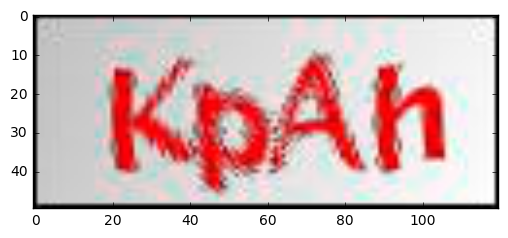

In [11]:
cn_get_imagCaptcha(r,1)

In [12]:
cn_mobile='15728738172'
cn_password=cn_login2(cn_n_value)

cn_imagCaptcha='kpah'
cn_Login3(r,cn_mobile,cn_password,cn_imagCaptcha)

/home/chinafishz/opt/anaconda2/lib/python2.7/site-packages/requests/packages/urllib3/connectionpool.py:838: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/security.html
  InsecureRequestWarning)


{"content":"http://gd.10086.cn/","type":"ucs.server.location.url"}


In [13]:
## -*-encoding:utf-8-*-
cn_Payment_startDate='20161022000000'
cn_Payment_endDate='20161022235959'
def cn_Login4(r,isProxy=1,proxyIp='10.244.155.153',proxyPort='8081'):
    if isProxy==0:
        proxy={}
    elif(isProxy==1):
        proxy={'http':proxyIp+':'+proxyPort,'https':proxyIp+':'+proxyPort}
    
    cn_UserAgent='Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/48.0.2564.116 Safari/537.36 TheWorld 7'
    cn_accept='*/*'
    header={'User-Agent': cn_UserAgent,'Accept':cn_accept,'Accept-Language':'zh-cn','Accept-Encoding':'gzip, deflate','X-Requested-With':'XMLHttpRequest'}
    parma={}
    result=r.post('http://gd.10086.cn/commodity/servicio/myService/queryBrand.jsps',data=parma,headers=header,proxies=proxy)
    soup=BeautifulSoup(result.text,'lxml')
    soup1=soup.findAll('p')[0].text.split('"')
    cn_url=soup1[3]
    
    cn_accept='image/jpeg, application/x-ms-application, image/gif, application/xaml+xml, image/pjpeg, application/x-ms-xbap, */*'
    header={'User-Agent': cn_UserAgent,'Accept':cn_accept,'Accept-Language':'zh-cn','Accept-Encoding':'gzip, deflate'}
    result=r.get(cn_url+'http://gd.10086.cn/my/QUERYSERVERFUNC.shtml',headers=header,proxies=proxy,verify=False)
#     print result.text

#开始登陆
    cn_accept='*/*'
    header={'User-Agent': cn_UserAgent,'Accept':cn_accept,'Accept-Language':'zh-cn','Accept-Encoding':'gzip, deflate','X-Requested-With':'XMLHttpRequest'}
    url='https://gd.ac.10086.cn/ucs/login/signup.jsps'
    parma={'backURL':'http://gd.10086.cn/my/QUERYSERVERFUNC.shtml','reqType':'0','channel':'0','cid':'10003','area':'/commodity','resource':'/commodity/servicio/myService/queryBrand.jsps','loginType':'2','optional':'on','exp':''}
    result=r.post(url,data=parma,headers=header,proxies=proxy,verify=False)
    soup=BeautifulSoup(result.text,'lxml')
    soup1=soup.findAll('p')[0].text.split('"')
    cn_url=soup1[3]
#     print cn_url
    
    
    cn_accept='image/jpeg, application/x-ms-application, image/gif, application/xaml+xml, image/pjpeg, application/x-ms-xbap, */*'
    header={'User-Agent': cn_UserAgent,'Accept':cn_accept,'Accept-Language':'zh-cn','Accept-Encoding':'gzip, deflate'}
    result=r.get(cn_url,headers=header,proxies=proxy)
    print result


#     print '11'

cn_Login4(r,1)


<Response [200]>


/home/chinafishz/opt/anaconda2/lib/python2.7/site-packages/requests/packages/urllib3/connectionpool.py:838: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/security.html
  InsecureRequestWarning)
/home/chinafishz/opt/anaconda2/lib/python2.7/site-packages/requests/packages/urllib3/connectionpool.py:838: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/security.html
  InsecureRequestWarning)


In [14]:
def cn_Login5(r,isProxy=1,proxyIp='10.244.155.153',proxyPort='8081'):
    if isProxy==0:
        proxy={}
    elif(isProxy==1):
        proxy={'http':proxyIp+':'+proxyPort,'https':proxyIp+':'+proxyPort}
    cn_UserAgent='Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/48.0.2564.116 Safari/537.36 TheWorld 7'
    cn_accept='*/*'
    header={'User-Agent': cn_UserAgent,'Accept':cn_accept,'Accept-Language':'zh-cn','Accept-Encoding':'gzip, deflate','X-Requested-With':'XMLHttpRequest'}
    parma={'servCode':'QUERYSERVERFUNC','operaType':'QUERY','Payment_startDate':cn_Payment_startDate,'Payment_endDate':cn_Payment_endDate}
    result1=r.post('http://gd.10086.cn/commodity/servicio/servicioForwarding/query.jsps',headers=header,data=parma,proxies=proxy)
    soup=BeautifulSoup(result1.text,'lxml')
    soup1=soup.select('.wdyw_div')[0].text
    soup1=''.join(soup1).split()[0]
    if(soup1==u'物联网3元国内中小流量套餐（超套餐停功能）'):
        return True
    else:
        return False
    
cn_Login5(r)

True

In [17]:
cn_Payment_startDate='20161022000000'
cn_Payment_endDate='20161022235959'
def cn_Login6(r,cn_Payment_startDate,cn_Payment_endDate,isProxy=1,proxyIp='10.244.155.153',proxyPort='8081'):
    if isProxy==0:
        proxy={}
    elif(isProxy==1):
        proxy={'http':proxyIp+':'+proxyPort,'https':proxyIp+':'+proxyPort}
               
    cn_UserAgent='Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/48.0.2564.116 Safari/537.36 TheWorld 7'
    cn_accept='*/*'
    header={'User-Agent': cn_UserAgent,'Accept':cn_accept,'Accept-Language':'zh-cn','Accept-Encoding':'gzip, deflate'}
    
    result=r.post('http://gd.10086.cn/my/STOP_OPEN_MOBILE.shtml',headers=header,proxies=proxy)
    
               
    
    cn_UserAgent='Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/48.0.2564.116 Safari/537.36 TheWorld 7'
    cn_accept='*/*'
    header={'User-Agent': cn_UserAgent,'Accept':cn_accept,'Accept-Language':'zh-cn','Accept-Encoding':'gzip, deflate','X-Requested-With':'XMLHttpRequest'}
    parma={'servCode':'STOP_OPEN_MOBILE','operaType':'QUERY','Payment_startDate':cn_Payment_startDate,'Payment_endDate':cn_Payment_endDate}
    result=r.post('http://gd.10086.cn/commodity/servicio/servicioForwarding/queryData.jsps',data=parma,headers=header,proxies=proxy)
#     print result.text
    soup=BeautifulSoup(result.text,'lxml')
    soup1=soup.text
    print ''.join(soup1).split()[0]

cn_Login6(r,cn_Payment_startDate,cn_Payment_endDate)

尊敬的客户，您的手机号码15728738172，已停机！


In [16]:
def cn_Login6(r,isProxy=1,proxyIp='10.244.155.153',proxyPort='8081'):
    if isProxy==0:
        proxy={}
    elif(isProxy==1):
        proxy={'http':proxyIp+':'+proxyPort,'https':proxyIp+':'+proxyPort}
               
    cn_UserAgent='Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/48.0.2564.116 Safari/537.36 TheWorld 7'
    cn_accept='*/*'
    header={'User-Agent': cn_UserAgent,'Accept':cn_accept,'Accept-Language':'zh-cn','Accept-Encoding':'gzip, deflate','X-Requested-With':'XMLHttpRequest'}
    parma={'sType':'0'}
    result=r.post('http://gd.10086.cn/commodity/servicio/nostandardserv/stopOpenMobile/validatePsw.jsps',data=parma,headers=header,proxies=proxy)
    print result.text
    result1=r.post('http://gd.10086.cn/commodity/servicio/nostandardserv/stopOpenMobile/validatePsw1.jsps',data=parma,headers=header,proxies=proxy)
#     print result1.text

cn_Login6(r,1)

尊敬的客户，您的手机号码15728738172，已停机！   停机操作成功！


In [18]:
cn_login_out(r)
# print cn_mainpage(r,1)

/home/chinafishz/opt/anaconda2/lib/python2.7/site-packages/requests/packages/urllib3/connectionpool.py:838: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/security.html
  InsecureRequestWarning)
/home/chinafishz/opt/anaconda2/lib/python2.7/site-packages/requests/packages/urllib3/connectionpool.py:838: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/security.html
  InsecureRequestWarning)


<Response [200]>


In [201]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
%matplotlib inline

#号码统一颜色
def cn_yanzhengma2():  

    src=cv2.imread("dongli100.png")
    src=cv2.resize(src,(src.shape[1]*5,src.shape[0]*5),interpolation=cv2.INTER_NEAREST)
    
    for i in range(src.shape[0]):
        for j in range(src.shape[1]):
            
            if(src[i,j][0]-src[i,j][2]>65) and (src[i,j][0]-src[i,j][1]>80) and (src[i,j][2]<170) and (src[i,j][1]<170):
                src[i,j]=[255,255,255]
            else:
                src[i,j]=[0,0,0]
           
    plt.figure()
    plt.imshow(src)
    return src
   
# a=cn_yanzhengma2()


/home/chinafishz/opt/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:15: RuntimeWarning: overflow encountered in ubyte_scalars


[115, 220]


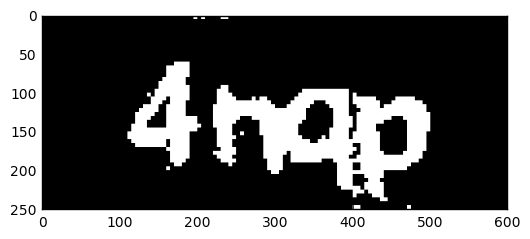

In [250]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import requests
%matplotlib inline



def cn_yanzhengma3(src): 
    kernel=np.ones((4,4),np.uint8)
#     erosion=cv2.erode(src,kernel,iterations=1)
#     blurred=cv2.GaussianBlur(erosion,(5,5),10)
#     edged=cv2.Canny(blurred,12,35)
    dilation=cv2.dilate(src,kernel,iterations=1)
#     plt.figure()
#     plt.imshow(dilation)
    cn_all=[]
    

    cn_w=src.shape[1]
    cn_h=src.shape[0]
    
    for i in range(cn_w):
        cn_a=0
        cn_b=0
        cn_all_temp=0
        #全部图片每一列的白点数量
        for j in range(cn_h):
            cn_all_temp=cn_all_temp+src[j,i][0]+src[j,i][1]+src[j,i][2]
            
        cn_all.append([i,cn_all_temp])
        
#-----------------------------------------
#     print cn_all
    cn_duan_zuo=[]
    cn_duan_you=[]
    cn_temp_i1=0
    cn_temp_i2=599
    cn_z=10
    
    for id,(i,j) in enumerate(cn_all):
#         print j
        if(j>cn_z*3*255):
            if(i-cn_temp_i1>1):
                cn_duan_zuo.append(i)
            cn_temp_i1=i#最左
    
    print cn_duan_zuo
#         if(cn_b>cn_z*3*255):
# #             print cn_w-1-i,cn_b,cn_temp_i2
#             if(cn_temp_i2-(cn_w-i-1)>1):
#                 cn_duan_you.insert(0,cn_w-i-1)
#             cn_temp_i2=cn_w-i-1#最右
            

#     cn_duan=[]
#     if(len(cn_duan_zuo)==4 and len(cn_duan_you)==4):
        
#         for i in range(4):
#             cn_duan.append([cn_duan_zuo[i],cn_duan_you[i]])
# #         print cn_duan
        
#         for id,(i,j) in  enumerate(cn_duan):
#             roi=dilation[0:250,i:j]
#             thresh=roi.copy()
#             res=cv2.resize(thresh,(120,250),interpolation=cv2.INTER_NEAREST)
#             cv2.imwrite("%d.png"%(id),res)
            
#         print cn_yanzhengma4()
#     elif(len(cn_duan_zuo)==3 and len(cn_duan_you)==3):
#         #如果发现只有3个属性，则拆分最多白点区域
#         for i in range(cn_w):
#         cn_a=0
#         cn_b=0
#         cn_z=20
#         if(i%100>30) and (i%100<80):
#             cn_z=10
#         for j in range(cn_h):
#             cn_a=cn_a+src[j,i][0]+src[j,i][1]+src[j,i][2]
#             cn_b=cn_b+src[j,cn_w-i-1][0]+src[j,cn_w-i-1][1]+src[j,cn_w-i-1][2]
#         if(cn_a>cn_z*3*255):
#             if(i-cn_temp_i1>1):
#                 cn_duan_zuo.append(i)
#             cn_temp_i1=i#最左
        
#         if(cn_b>cn_z*3*255):
# #             print cn_w-1-i,cn_b,cn_temp_i2
#             if(cn_temp_i2-(cn_w-i-1)>1):
#                 cn_duan_you.insert(0,cn_w-i-1)
#             cn_temp_i2=cn_w-i-1#最右
#     elif(len(cn_duan_zuo)<>len(cn_duan_you)):
#         print "左面和右面分界不对等"
#     else:
#         print "左面和右面分解不为4个"
        
        
r=requests.session()

# cn_get_imagCaptcha(r)
a=cn_yanzhengma2()
b=a
cn_yanzhengma3(b)


In [ ]:
# ary=[]
#     ary1=[]
#     cn_x=0
#     cn_y=0
#     cn_i=0
#     cn_w=0
#     for (c,_) in cnts:
#         (x,y,w,h)=cv2.boundingRect(c)
# #         print x,y,w,h
#         if(w>45 and h>50) :
            
#             print cn_x,x,y,w,h
#             cn_x=x
#             cn_w=w
#             if cn_i>-1:
#                 if(w>170):
#                     ary.append((x,y,w/2,h))
#                     ary.append((x+w/2,y,w/2,h))
#                     cn_x=x+w/2+10
#                 else:
#                     ary.append((x,y,w,h))
#                     cn_i=cn_i+1
#             else:
#                 cn_i=cn_i+1
    
#     if(len(ary)==3):
#         cn_i=0
#         cn_n=0
#         for i in ary:
#             if(i[3]>cn_i):
#                 cn_i=i[3]
#                 cn_n=i#最高对应的小括号
#         k=1
# #         print cn_n
#         for j in ary:
#             if(j<>cn_n):
#                 print j
#                 ary1.append(j)
#                 k=k+1
#             else:
#                 ary1.append((j[0],j[1],j[2]/2,j[3]))
#                 ary1.append((j[0]+j[2]/2,j[1],j[2]/2,j[3]))
#                 k=k+2
                
#         ary=ary1
#     elif(len(ary)<3):
#         print "描边失败:分拆少于3幅图"

# #     print ary
#     for id,(x,y,w,h) in enumerate(ary):
#         roi=dilation[y:y+h,x:x+w]
#         thresh=roi.copy()
# #         a=fig.add_subplot(1,len(ary),id+1)
#         res=cv2.resize(thresh,(100,100),interpolation=cv2.INTER_NEAREST)
#         cv2.imwrite("%d.png"%(id),res)
# #         plt.imshow(res)


In [210]:
import os

def mse(imageA,imageB):
    err=np.sum((imageA.astype("float")-imageB.astype("float"))**2)
    err /= float(imageA.shape[0]*imageA.shape[1])
    return err
    
# print mse(pic2,pic3)
    
    
def getnumber(pic):
    min_a=999999999999999999999
    min_png=None
    for png in os.listdir('alphabet'):
        ref =cv2.imread("alphabet/"+png)
        if mse(ref,pic)<min_a:
            min_a=mse(ref,pic)
            min_png=png
    cn_temp=min_png.split('.')[0]
    return cn_temp


def cn_yanzhengma4():
    
    pic0=cv2.imread("0.png")
    pic1=cv2.imread("1.png")
    pic2=cv2.imread("2.png")
    pic3=cv2.imread("3.png")

    return getnumber(pic0)+getnumber(pic1)+getnumber(pic2)+getnumber(pic3)

# print c
